<a href="https://colab.research.google.com/github/Harun2703/Python/blob/master/ICP-13/SourceCode/ICP_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from keras.layers import Input, Dense
from keras.models import Model

**AutoEncoder[Hidden Layers]**

In [8]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded1 = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(2*encoding_dim, activation='relu')(encoded1)
decoded1 = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded1)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
from keras.datasets import mnist, fashion_mnist
import numpy as np
from keras.callbacks import TensorBoard
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train1 = x_train.astype('float32') / 255.
x_test1 = x_test.astype('float32') / 255.
x_train1 = x_train1.reshape((len(x_train1), np.prod(x_train1.shape[1:])))
x_test1 = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
tensorboard = TensorBoard(log_dir="logs/final", histogram_freq=1, write_graph=True, write_images=False)
history = autoencoder.fit(x_train1, x_train1,epochs=5,batch_size=256,shuffle=True,validation_data=(x_test1, x_test1),callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.5245 - val_loss: 0.4445
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3960 - val_loss: 0.3791
Epoch 3/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3720 - val_loss: 0.3655
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.3615 - val_loss: 0.3542
Epoch 5/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.3490 - val_loss: 0.3469


In [10]:
prediction = autoencoder.predict(x_test1)

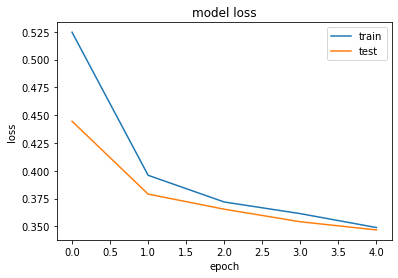

In [12]:
# summarize history for loss
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

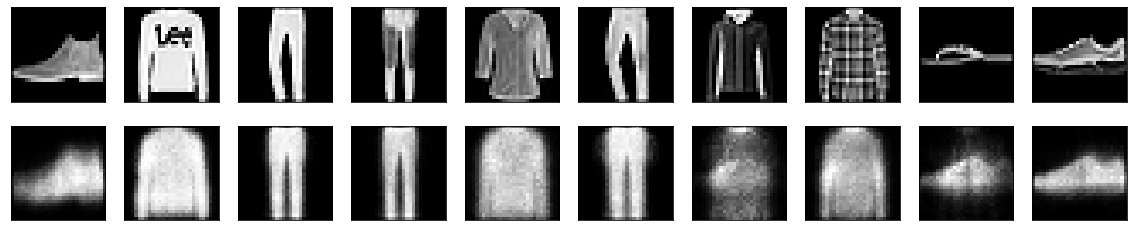

In [13]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(prediction[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
noise_factor= 0.5
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train1.reshape((len(x_train1), np.prod(x_train1.shape[1:])))
x_test = x_test1.reshape((len(x_test1), np.prod(x_test1.shape[1:])))
x_train_noisy= x_train+ noise_factor* np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy= x_test+ noise_factor* np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
history1 = autoencoder.fit(x_train_noisy, x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.3448 - val_loss: 0.3313
Epoch 2/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.3378 - val_loss: 0.3269
Epoch 3/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3334 - val_loss: 0.3199
Epoch 4/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.3298 - val_loss: 0.3165
Epoch 5/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3276 - val_loss: 0.3197
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3259 - val_loss: 0.3158
Epoch 7/10
60000/60000 [==============================] - 4s 60us/step - loss: 0.3246 - val_loss: 0.3126
Epoch 8/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3236 - val_loss: 0.3091
Epoch 9/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.3221 - val_loss: 0.3082
Epoch

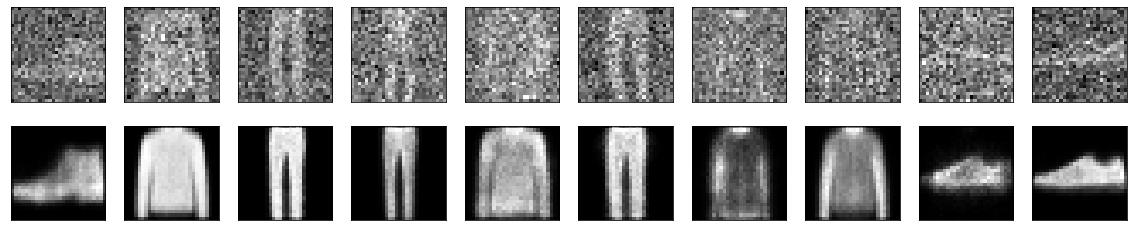

In [15]:
prediction_noisy = autoencoder.predict(x_test_noisy)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(prediction_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

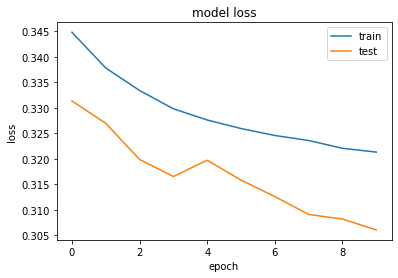

In [16]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()